In [1]:
import json
with open('ngrams.json') as f:
    data = json.load(f)
    
data

{u'bi': [[[u'cut', u'cut'], 68.86504149126672],
  [[u'wine', u'guy'], 23.54765100656167],
  [[u'grab', u'spoon'], 18.838120805249336],
  [[u'push', u'stair'], 18.838120805249336],
  [[u'paul', u'wine'], 18.838120805249336],
  [[u'your', u'shoe'], 17.21626037281668],
  [[u'know', u'paul'], 17.21626037281668],
  [[u'paul', u'monica'], 17.21626037281668],
  [[u'one', u'woman'], 14.443671650576897],
  [[u'fifth', u'date'], 14.128590603937003],
  [[u'shoe', u'your'], 12.912195279612511],
  [[u'real', u'date'], 12.912195279612511],
  [[u'la', u'vega'], 10.832753737932673],
  [[u'woman', u'that'], 9.419060402624668],
  [[u'bookcas', u'chandler'], 9.419060402624668],
  [[u'great', u'butt'], 9.419060402624668],
  [[u'stair', u'push'], 9.419060402624668],
  [[u'ross', u'grab'], 9.419060402624668],
  [[u'made', u'coffe'], 9.419060402624668],
  [[u'morn', u'paul'], 9.419060402624668]],
 u'tri': [[[u'cut', u'cut', u'cut'], 65.93342281837268],
  [[u'paul', u'wine', u'guy'], 18.838120805249336],
  [[

In [2]:
from graph_tool.all import *

g = Graph()
v_prop = g.new_vertex_property("string")
v_keep = g.new_vertex_property("bool")

In [ ]:
vertices = {}
for w, _ in data['uni'][:10]:
    v = g.add_vertex()
    v_prop[v] = w
    vertices[w] = v
    v_keep[v] = False
    
for bi, _ in data['bi'][:10]:
    v = g.add_vertex()
    v_prop[v] = bi
    vertices[tuple(bi)] = v
    
    for w in bi:
        if w in vertices:
            if not g.edge(vertices[w], v):
                g.add_edge(vertices[w], v)
            v_keep[v] = True
            v_keep[vertices[w]] = True
            
for tri, _ in data['tri'][:10]:
    v = g.add_vertex()
    v_prop[v] = tri
    vertices[tuple(tri)] = v
    
    for w in tri:
        if w in vertices:
            if not g.edge(vertices[w], v):
                g.add_edge(vertices[w], v)
            v_keep[v] = True
            v_keep[vertices[w]] = True
            
    for w in zip(tri, tri[1:]):
        if tuple(w) in vertices:
            if not g.edge(vertices[w], v):
                g.add_edge(vertices[w], v)
            v_keep[v] = True
            v_keep[vertices[tuple(w)]] = True
            
g.set_vertex_filter(v_keep)

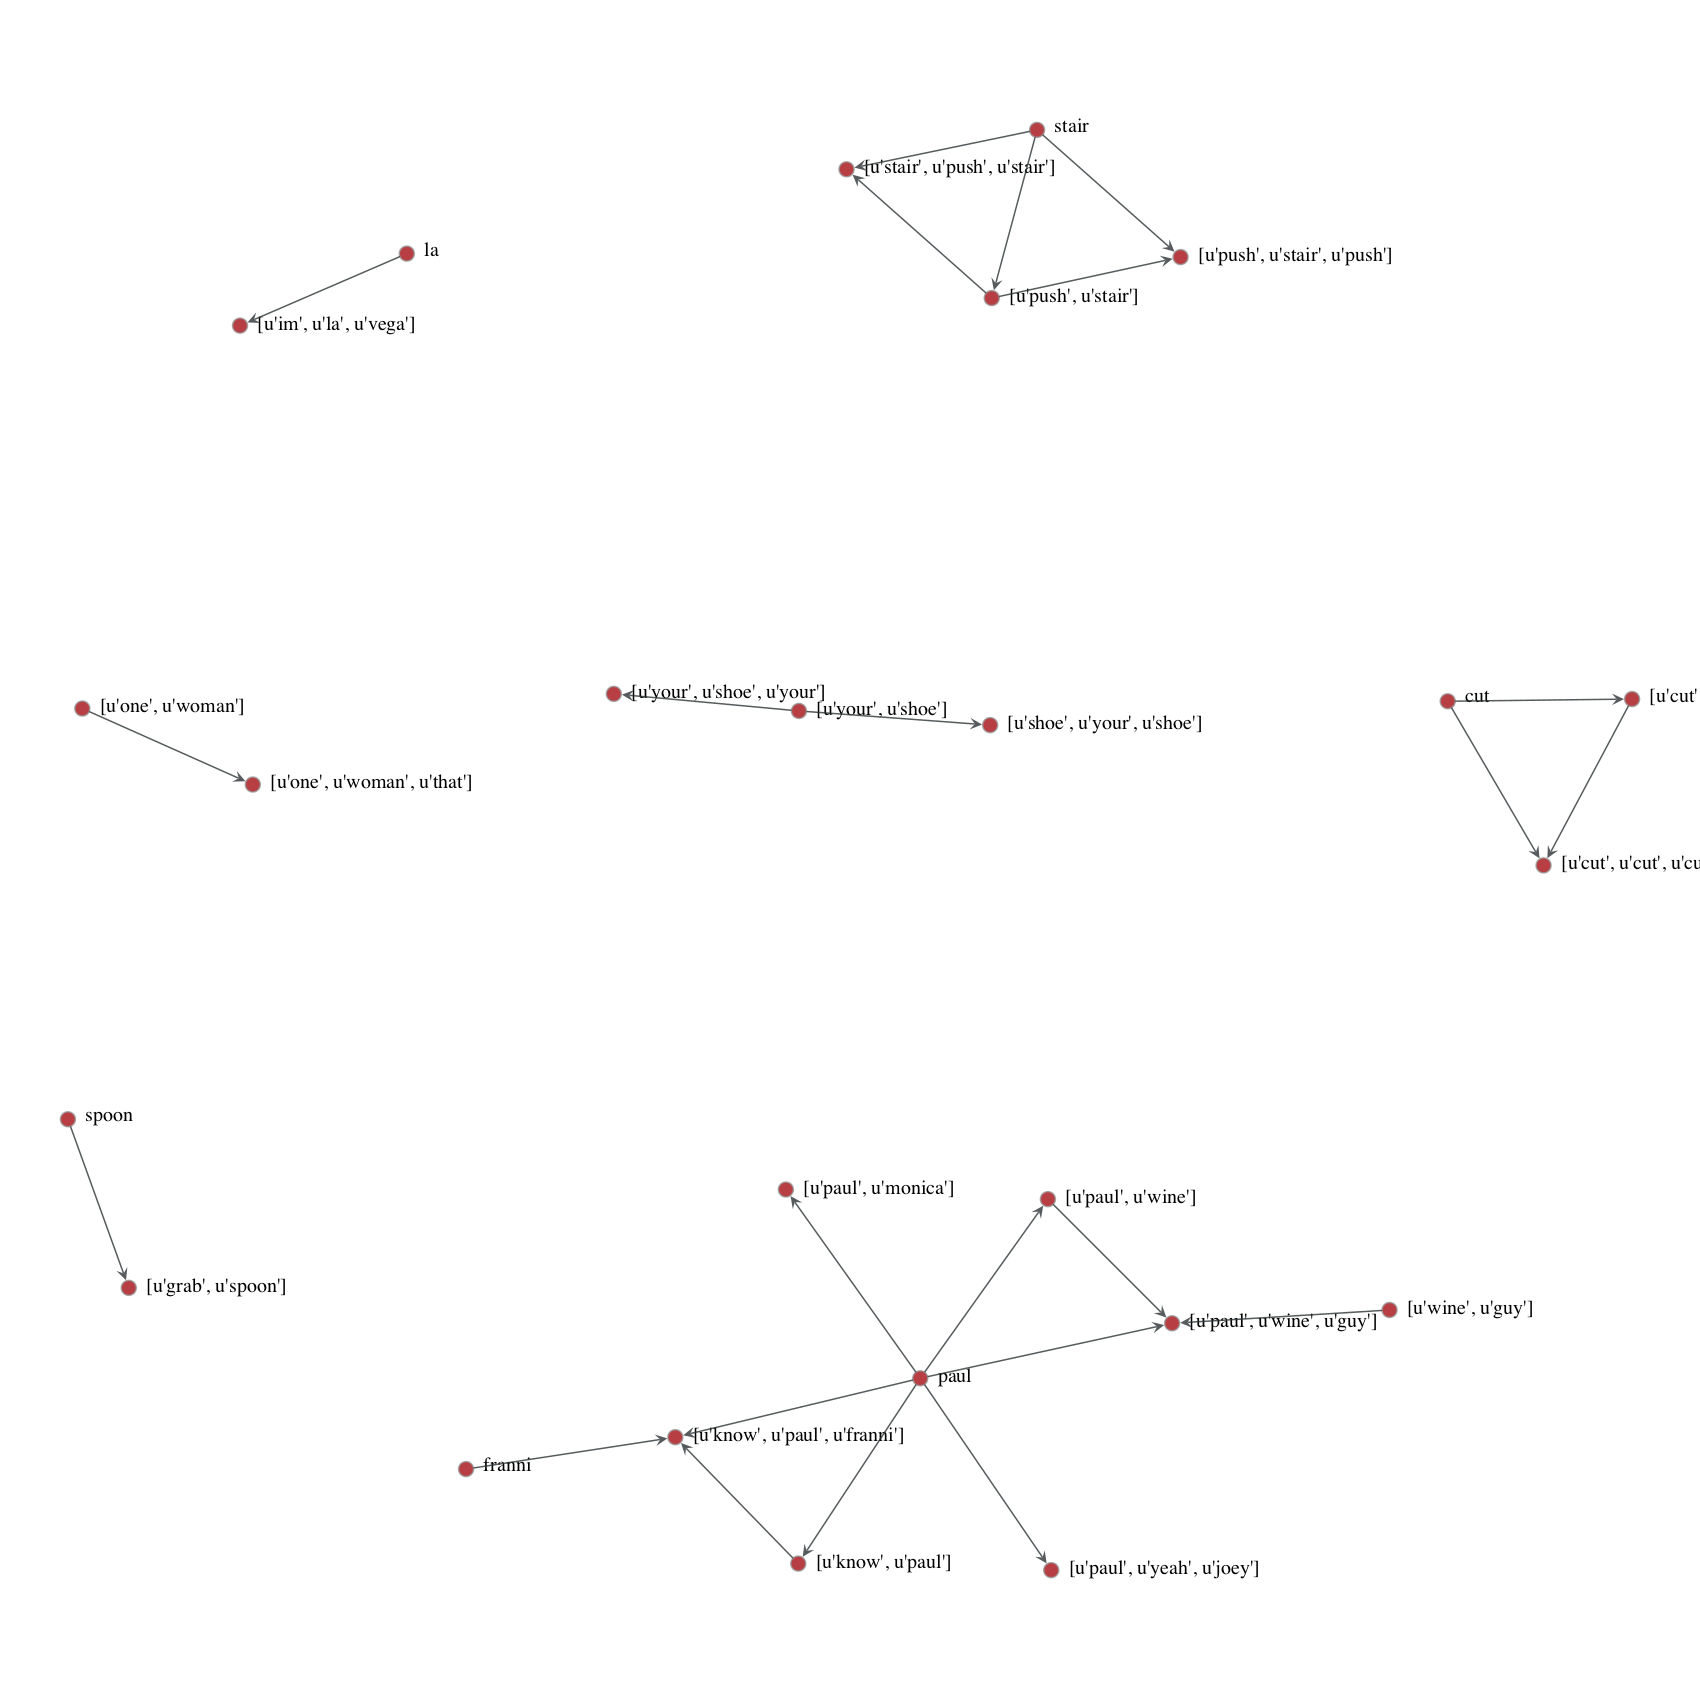

In [ ]:
import graph_tool as gt
import graph_tool.draw
import graph_tool.collection

import matplotlib.pyplot as plt
%matplotlib inline

# The following should be your drawing cell:
plt.figure(figsize=(2700,2700))
pos = gt.draw.sfdp_layout(g)
#gt.draw.graph_draw(g, vertex_text=v_prop, inline=True, pos=pos, vertex_text_position=1) # Can add more options
#graph_draw(g, inline=True, vertex_text=v_prop, vertex_text_position=1, vertex_font_size=10, vertex_size=5) # Can add more options
graph_draw(g, output_size=(1700,1700), vertex_text=v_prop, output="min_tree.png", inline=True,
           nodesfirst=True, vertex_text_position=6, vertex_font_size=20, vertex_size=15)
